# 1. 패키지 불러오기

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

# 경고창 무시하기
import warnings
warnings.filterwarnings('ignore')

# 모든 열 확인하기
pd.set_option('display.max_columns', None)

# 2. 데이터 불러오기

In [2]:
train=pd.read_csv("./dataset/train_data.csv")
test=pd.read_csv("./dataset/test_data.csv")
answer=pd.read_csv("./dataset/answer_sample.csv")

In [3]:
print(train.shape)
print(test.shape) # test가 압도적으로 많다

(2463, 8)
(7389, 8)


In [4]:
# 원본 데이터 변형없이 유지하기 위하여 복제하기
train_copy=train.copy()
test_copy=test.copy()

# 3. 데이터 형태 확인하기

* Step 1. air_inflow (압축하기 전 필터된 대기 공기)
* Step 2. motor_current, motor_rpm, motor_temp, motor_vibe
* Step 3. 
* Step 4. out_pressure 
* Step 5. air_inflow
* 반복 ...

In [5]:
train_copy.info() # 모든 열이 문자열이 아니다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     2463 non-null   float64
 1   air_end_temp   2463 non-null   float64
 2   out_pressure   2463 non-null   float64
 3   motor_current  2463 non-null   float64
 4   motor_rpm      2463 non-null   float64
 5   motor_temp     2463 non-null   float64
 6   motor_vibe     2463 non-null   float64
 7   type           2463 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB


In [6]:
train_copy.isnull().sum() # 결측치 없다

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [7]:
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,2463.0,2.128843,1.202328e+00,0.33,1.28,1.96,2.820,6.22
air_end_temp,2463.0,49.001137,8.725091e+00,32.03,41.60,48.98,56.355,64.96
out_pressure,2463.0,0.700000,2.964897e-14,0.70,0.70,0.70,0.700,0.70
motor_current,2463.0,27.490715,1.360460e+01,5.34,17.11,25.85,36.000,72.00
motor_rpm,2463.0,2372.576939,6.878708e+02,1201.00,1784.50,2358.00,2971.000,3564.00
motor_temp,2463.0,65.766707,7.797152e+00,50.36,59.15,65.64,72.275,80.52
motor_vibe,2463.0,3.452972,1.576386e+00,1.97,2.88,3.26,3.730,21.87
type,2463.0,2.957369,2.230113e+00,0.00,1.00,3.00,5.000,7.00


## 3-1. 데이터의 상관관계 파악하기

<Figure size 1500x1500 with 0 Axes>

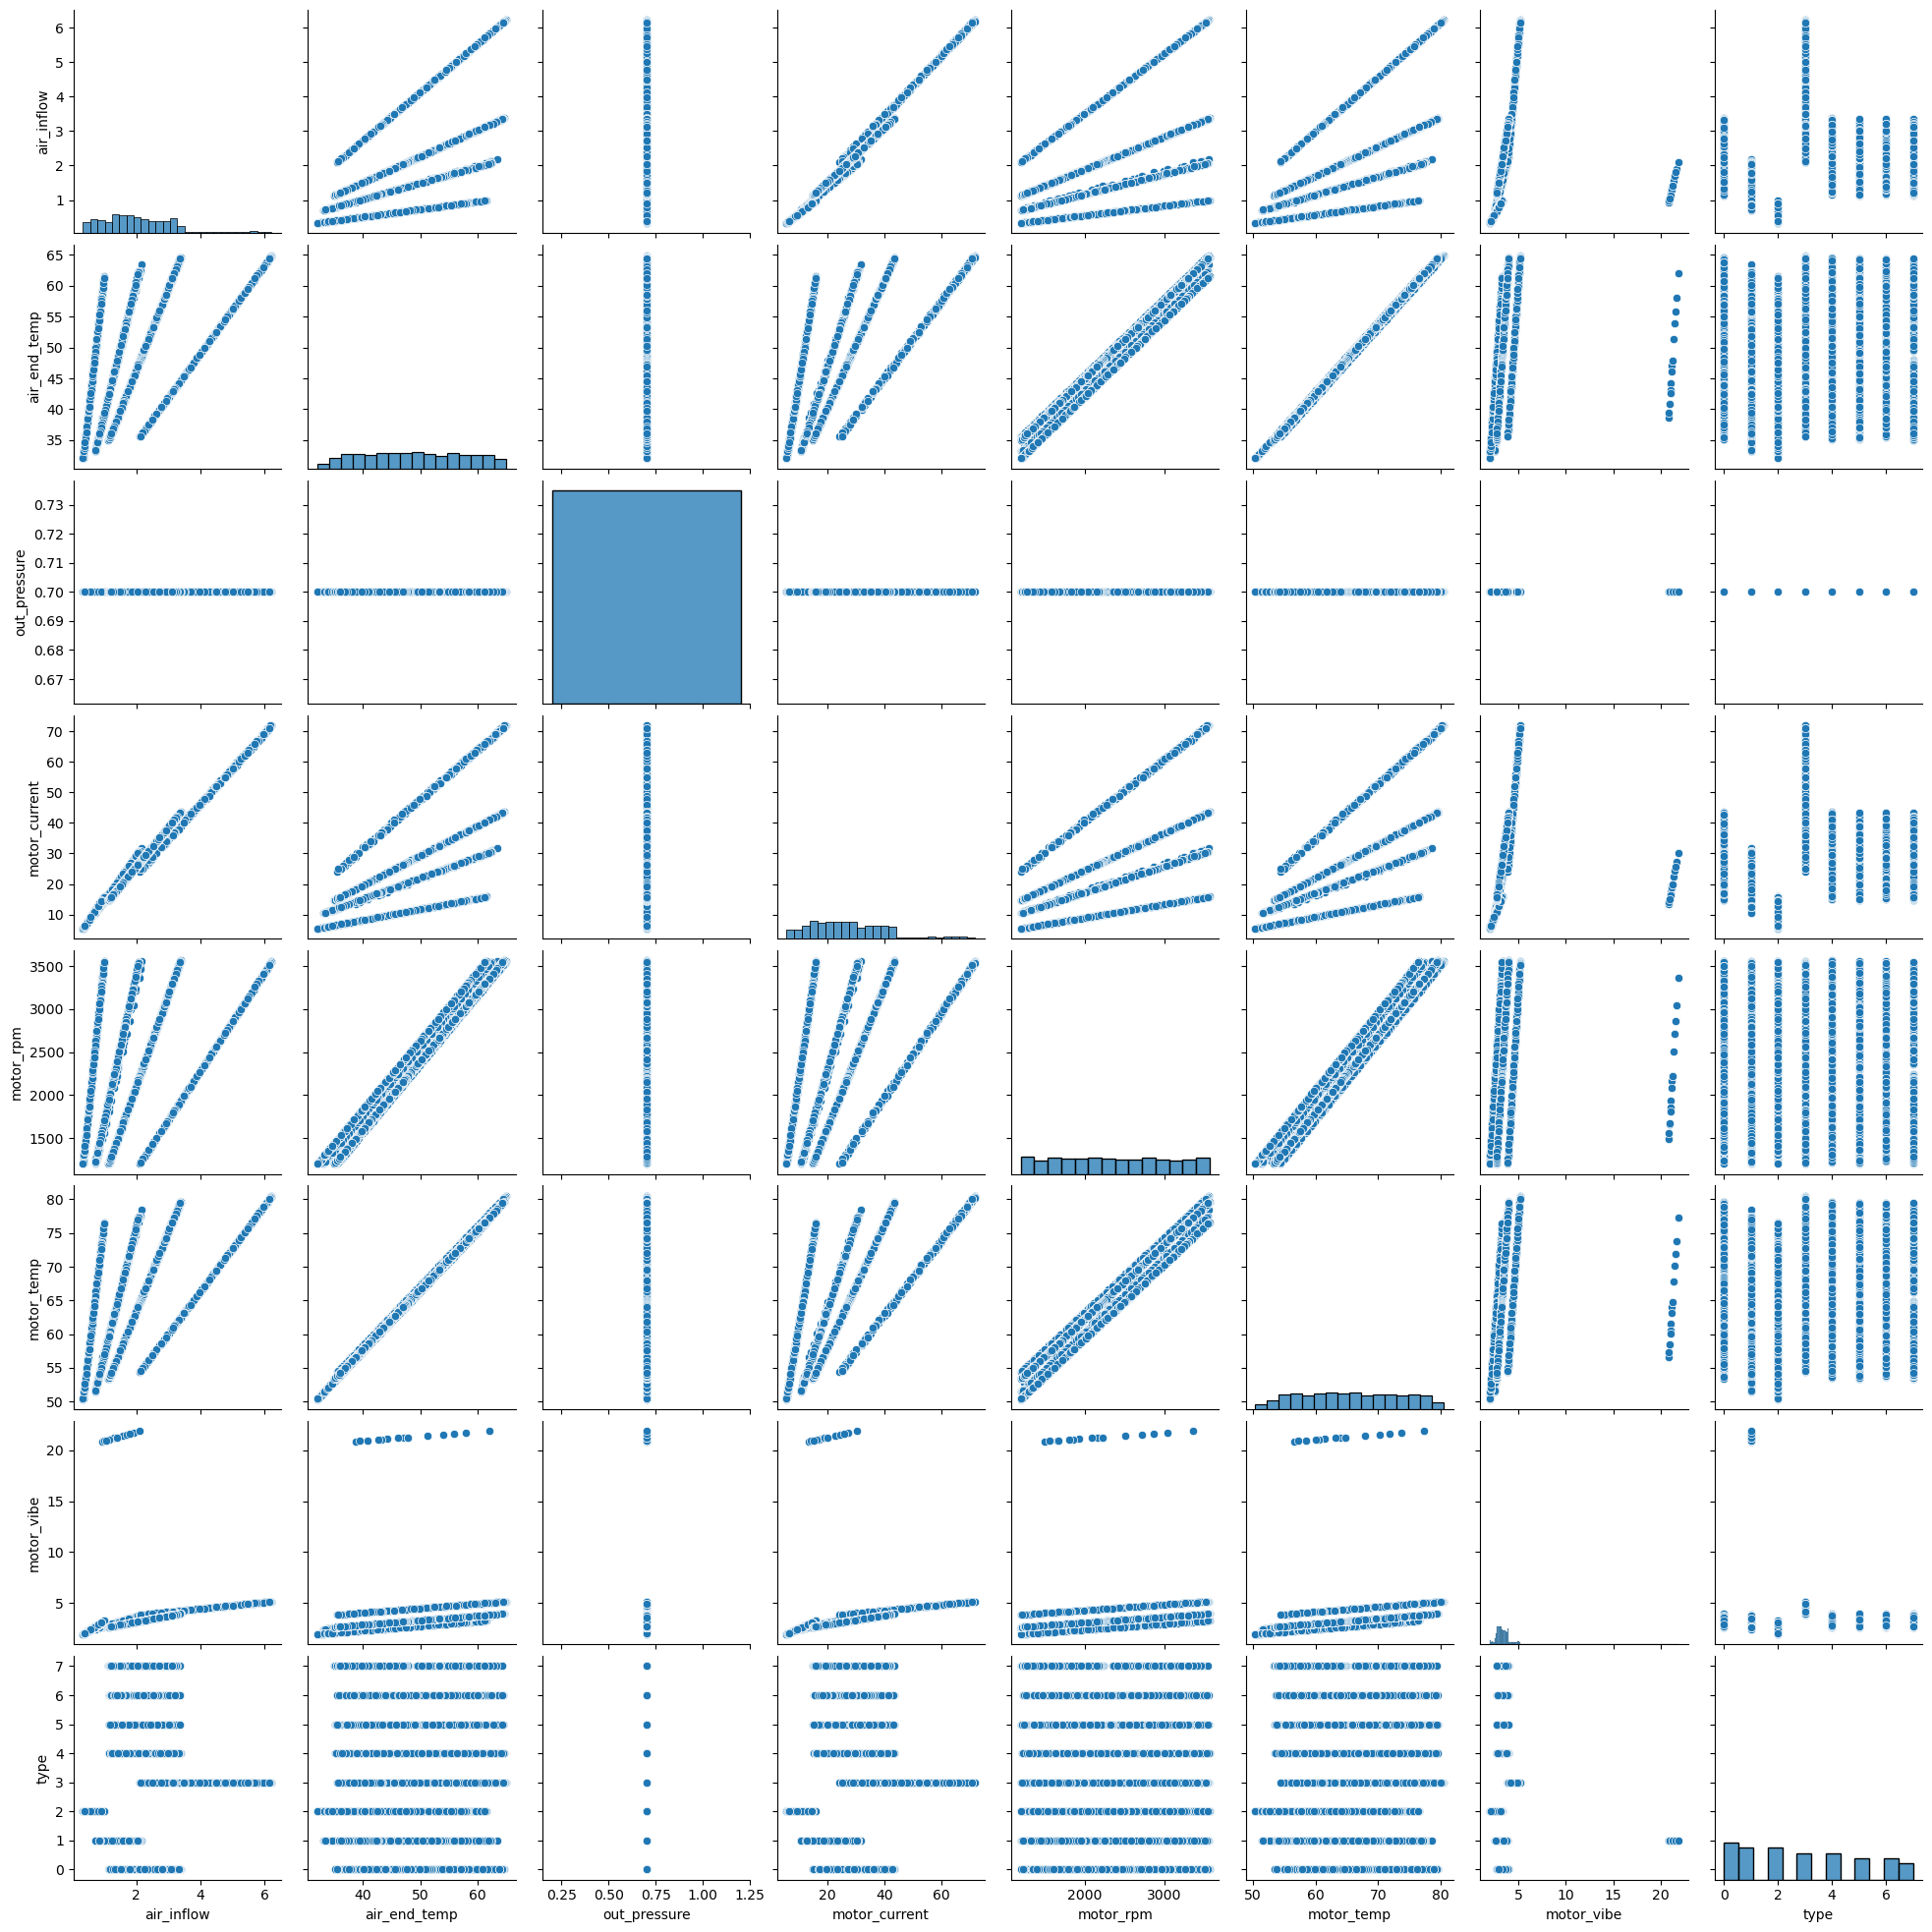

In [8]:
plt.figure(figsize=(15, 15))
_=sns.pairplot(train_copy)
plt.show()

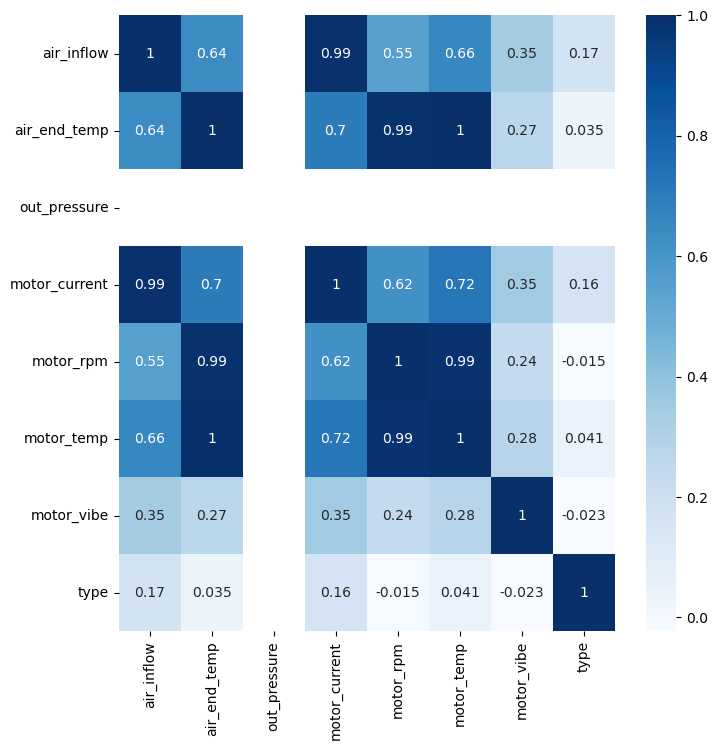

In [9]:
plt.figure(figsize=(8, 8))
_=sns.heatmap(train_copy.corr(), annot=True, cmap="Blues")
plt.show()

높은 양의 상관관계를 가지는 칼럼들이 많다.
* 1
* 0.99 

## 3-2. 각각의 데이터 칼럼의 분포 알아보기

In [10]:
train_copy.groupby(["type"]).size()

type
0    432
1    369
2    366
3    306
4    306
5    249
6    249
7    186
dtype: int64

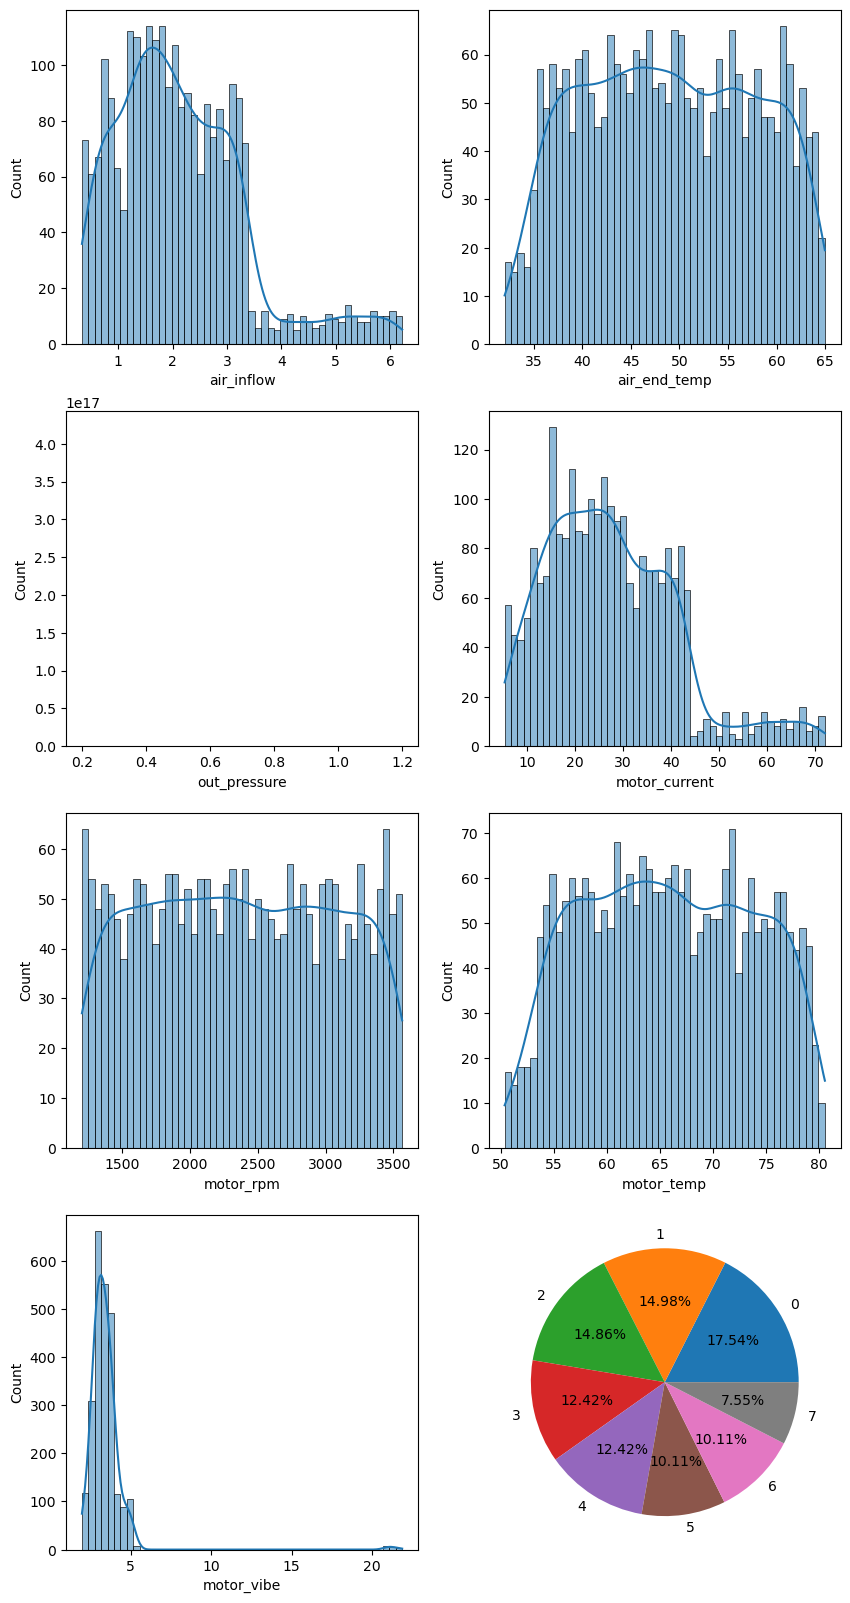

In [11]:
fig, ax=plt.subplots(4, 2, figsize=(10, 20))
ax=ax.flatten()

# 공기 흡입 유량
_=sns.histplot(train_copy, x="air_inflow", bins=50, kde=True, ax=ax[0])

# 공기 말단 온도
_=sns.histplot(train_copy, x="air_end_temp", bins=50, kde=True, ax=ax[1])

# 토출 압력
_=sns.histplot(train_copy, x="out_pressure", bins=50, kde=True, ax=ax[2])

# 모터 전류
_=sns.histplot(train_copy, x="motor_current", bins=50, kde=True, ax=ax[3])

# 모터 회전수
_=sns.histplot(train_copy, x="motor_rpm", bins=50, kde=True, ax=ax[4])

# 모터 온도
_=sns.histplot(train_copy, x="motor_temp", bins=50, kde=True, ax=ax[5])

# 모터 진동
_=sns.histplot(train_copy, x="motor_vibe", bins=50, kde=True, ax=ax[6])

# 설비 번호
_=train_copy.groupby(["type"]).size().plot.pie(ax=ax[7], autopct="%.2f%%")
_=ax[7].set_ylabel("")

In [14]:
# 토출 압력
train_copy["out_pressure"].unique()

array([0.7])

In [15]:
train_copy.groupby(["out_pressure"]).size()

out_pressure
0.7    2463
dtype: int64

* 레이블 인코딩 : 문자열 없으므로 안 해도 될 것 같다.
* 원핫인코딩 : 회귀 분석 할거 아니니까 안 해도 될 것 같다.
* 피처 스케일링 및 정규화 : 다 다른 값을 가지고 있기 때문에 해야될 것 같다.

# 4. Cluster Map

In [31]:
train_copy.corr()
# out_pressure가 모두 0.7이므로, 변동이 전혀 없기 때문에 상관 관계가 있는 nan을 반환한다.

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
air_inflow,1.000000,0.636467,NaN,0.994585,0.549101,0.659138,0.347755,0.169851
air_end_temp,0.636467,1.000000,NaN,0.703042,0.990302,0.999506,0.273699,0.034830
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.994585,0.703042,NaN,1.000000,0.619536,0.723685,0.353014,0.160190
motor_rpm,0.549101,0.990302,NaN,0.619536,1.000000,0.986419,0.237544,-0.015008
motor_temp,0.659138,0.999506,NaN,0.723685,0.986419,1.000000,0.282746,0.040964
motor_vibe,0.347755,0.273699,NaN,0.353014,0.237544,0.282746,1.000000,-0.023323
type,0.169851,0.034830,NaN,0.160190,-0.015008,0.040964,-0.023323,1.000000


In [43]:
## ValueError: Distance matrix 'X' must be symmetric.
## NaN 때문에 지금 안되는 중...

# import scipy.spatial as sp, scipy.cluster.hierarchy as hc

# row_dism = 1 - train_copy.T.corr()
# row_linkage = hc.linkage(sp.distance.squareform(row_dism), method='complete')
# col_dism = 1 - train_copy.corr()
# col_linkage = hc.linkage(sp.distance.squareform(col_dism), method='complete')

# sns.clustermap(train_copy,figsize=(5, 5),row_linkage=row_linkage, col_linkage=col_linkage)

In [44]:
## ValueError: The condensed distance matrix must contain only finite values.

# _=sns.clustermap(train_copy.corr(), annot=True, cmap="viridis")

유사성에 따라 몇몇의 특징을 그룹화 진행하기.

# 5. 이상치 확인하기

In [45]:
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
air_inflow,2463.0,2.128843,1.202328e+00,0.33,1.28,1.96,2.820,6.22
air_end_temp,2463.0,49.001137,8.725091e+00,32.03,41.60,48.98,56.355,64.96
out_pressure,2463.0,0.700000,2.964897e-14,0.70,0.70,0.70,0.700,0.70
motor_current,2463.0,27.490715,1.360460e+01,5.34,17.11,25.85,36.000,72.00
motor_rpm,2463.0,2372.576939,6.878708e+02,1201.00,1784.50,2358.00,2971.000,3564.00
motor_temp,2463.0,65.766707,7.797152e+00,50.36,59.15,65.64,72.275,80.52
motor_vibe,2463.0,3.452972,1.576386e+00,1.97,2.88,3.26,3.730,21.87
type,2463.0,2.957369,2.230113e+00,0.00,1.00,3.00,5.000,7.00


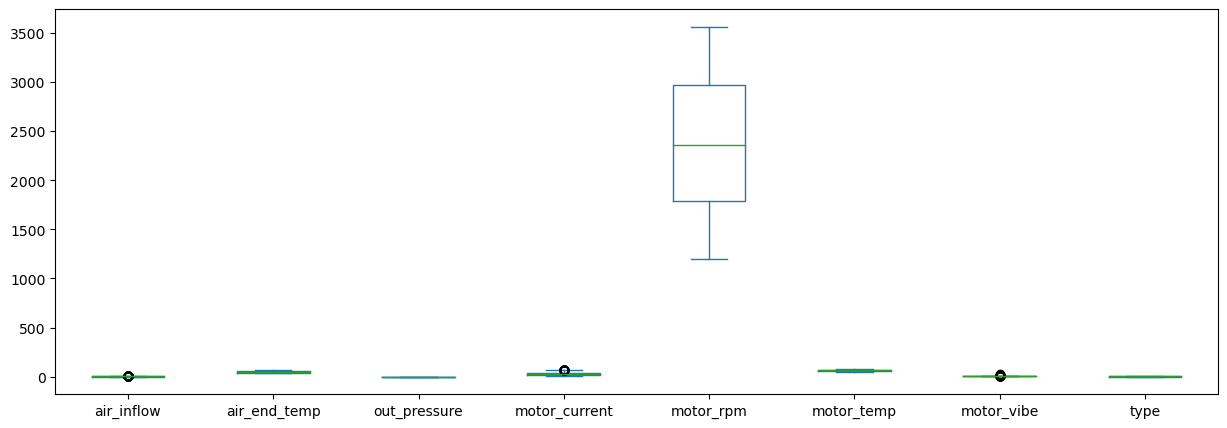

In [46]:
_=fig, ax=plt.subplots(1, 1, figsize=(15, 5))
_=train_copy.plot.box(ax=ax)

모터 회전수가 압도적으로 높아서 다른 칼럼들의 상태를 확인할 수 없기 때문에 일단 제거하고 박스 모델 그려보기.

In [47]:
train_box=train_copy.drop("motor_rpm", axis=1)

In [48]:
train_box

,air_inflow,air_end_temp,out_pressure,motor_current,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,58.67,2.93,0
1,2.97,59.28,0.7,38.40,74.91,3.75,0
2,1.91,45.29,0.7,24.73,62.48,3.12,0
3,2.37,51.33,0.7,30.63,67.84,3.39,0
4,1.90,45.21,0.7,24.65,62.41,3.12,0
...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,66.84,3.34,7
2459,2.04,46.94,0.7,26.34,63.94,3.20,7
2460,1.19,35.74,0.7,15.39,53.99,2.70,7
2461,1.21,36.00,0.7,15.64,54.22,2.71,7


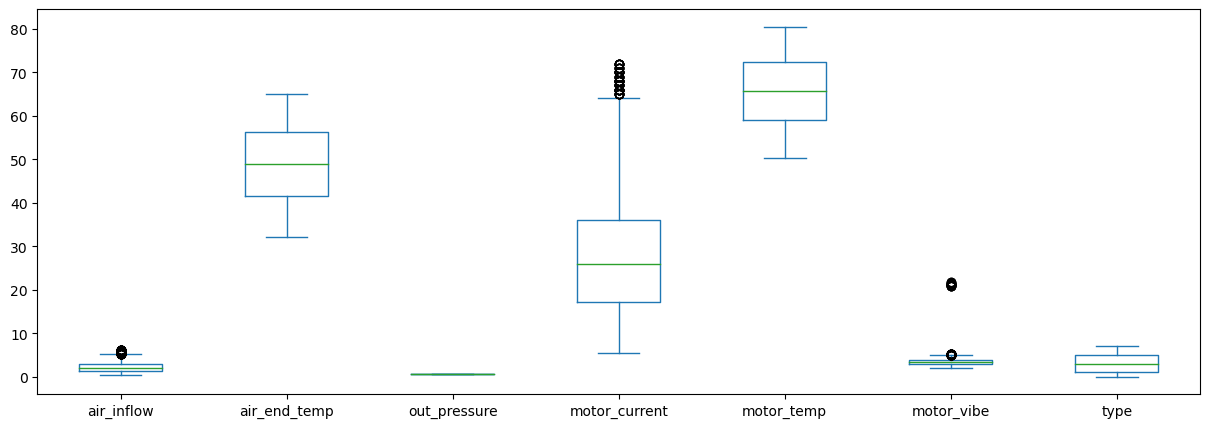

In [49]:
_=fig, ax=plt.subplots(1, 1, figsize=(15, 5))
_=train_box.plot.box(ax=ax)

공기 말단 온도와 모터 온도, 설비번호는 이상치가 없다.

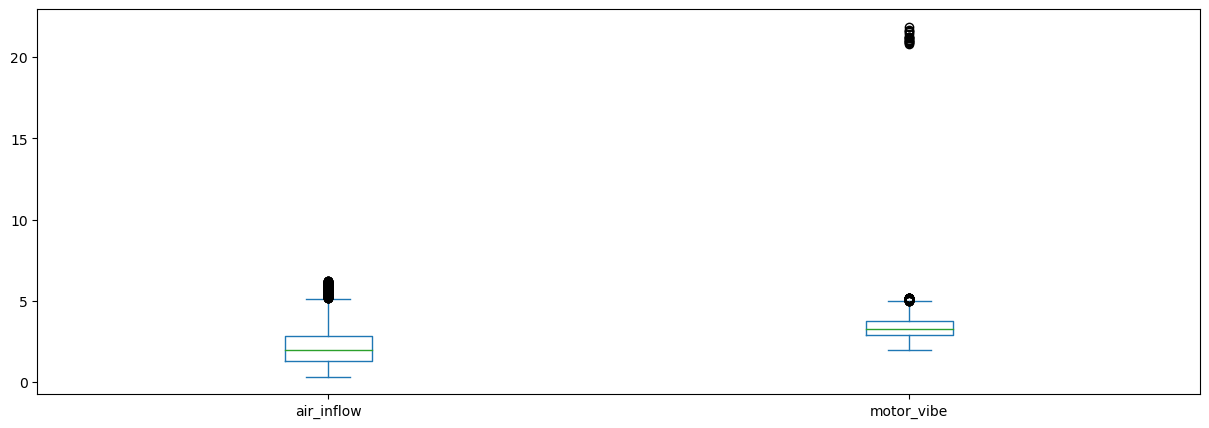

In [50]:
_=fig, ax=plt.subplots(1, 1, figsize=(15, 5))
_=train_box[["air_inflow", "motor_vibe"]].plot.box(ax=ax)

모터 전류, 공기 흡입 유량, 모터 진동은 이상치가 존재한다. 스케일링을 진행한 뒤에 제거해야할 필요가 있다.

# 6. 스케일링 진행하기

## 6-1. 스케일링 선택 기준

이상치 확인하다 보니까, 스케일링이 더 시급해보인다.
* 표준화 : 평균을 0, 분산을 1로 스케일링 진행하기.
* 정규화 : 모든 특성들을 [0, 1] 범위를 갖게 만들기.

* 가우시안 분포를 따르는 경우 : StandardScaler
* 가우시안 분포를 따르지 않는 경우 : MinMaxScaler

In [51]:
train_copy.columns

Index(['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type'],
      dtype='object')

## 6-2. Q-Q 플롯 그리기

* 직선의 형태인 경우 : 정규성을 따른다, StandardScaler? 
* 휘어진 형태인 경우 : 정규성을 따르지 않는다, MinMaxScaler?

(-3.7938461594331523,
 3.7938461594331523,
 -22.865266400759694,
 77.84669555220101)

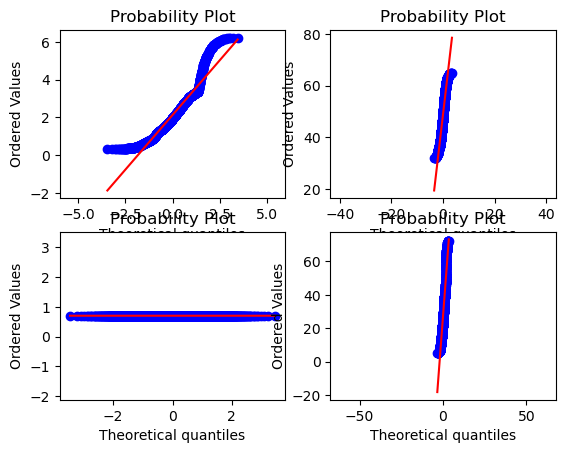

In [52]:
ax1 = plt.subplot(221)
res = stats.probplot(train_copy["air_inflow"], plot=plt)
plt.axis("equal")

ax2 = plt.subplot(222)
res = stats.probplot(train_copy["air_end_temp"], plot=plt)
plt.axis("equal")

ax3 = plt.subplot(223)
res = stats.probplot(train_copy["out_pressure"], plot=plt)
plt.axis("equal")

ax4 = plt.subplot(224)
res = stats.probplot(train_copy["motor_current"], plot=plt)
plt.axis("equal")

* 공기 흡입 유량 : 정규성 X 
* 공기 말단 온도, 토출 압력, 모터 전류 : 정규성 O

(-3.7938461594331523,
 3.7938461594331523,
 -5.175232420675905,
 11.089970544914639)

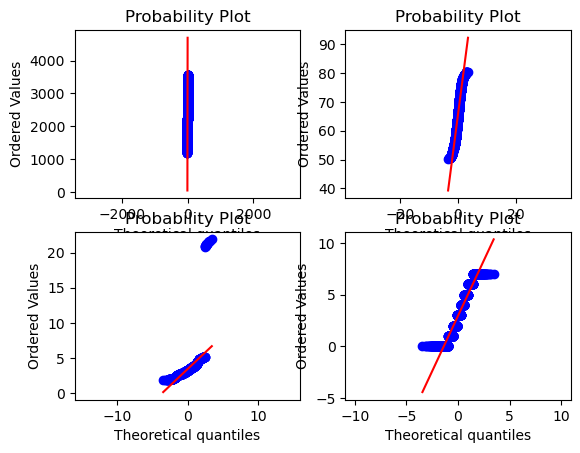

In [53]:
ax5 = plt.subplot(221)
res = stats.probplot(train_copy["motor_rpm"], plot=plt)
plt.axis("equal")

ax6 = plt.subplot(222)
res = stats.probplot(train_copy["motor_temp"], plot=plt)
plt.axis("equal")

ax7 = plt.subplot(223)
res = stats.probplot(train_copy["motor_vibe"], plot=plt)
plt.axis("equal")

ax8 = plt.subplot(224)
res = stats.probplot(train_copy["type"], plot=plt)
plt.axis("equal")

* 모터 회전수, 모터 온도, 모터 진동 : 정규성 O
* 설비 번호 : 정규성 X

In [54]:
# 그러면 정규성 유무에 따라서 각각 스케일링을 적용해야 하는가?